# Центральная предельная теорема


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from math import sqrt
import random
%matplotlib inline
random.seed(1)

# Бета-распределение

Бета-распределение в теории вероятностей и статистике — двухпараметрическое семейство абсолютно непрерывных распределений. Используется для описания случайных величин, значения которых ограничены конечным интервалом.
https://ru.wikipedia.org/wiki/%D0%91%D0%B5%D1%82%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

Выберем бета распределение с параметрами alpha = 0.5 и beta = 0.5

Созданим само бета распределение и выборку из него с n = 1000

In [2]:
beta_rv = stats.beta(0.5, 0.5)
sample_beta = beta_rv.rvs(1000)

Построем сглаженную функцию плотности для выборки (KDE), теоретическую плотность для данного распределения и гистограмму.

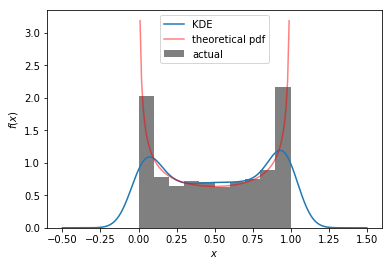

In [18]:
x1 = np.linspace(0, 1, 100)
pdf1 = beta_rv.pdf(x1)

df1 = pd.DataFrame(sample_beta, columns=['KDE'])
ax1 = df.plot(kind='density')

plt.plot(x1, pdf1, label='theoretical pdf', c='r', alpha=0.5)
plt.hist(sample_beta, normed=True, color='grey', label='actual')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Cреднее и дисперсия определены следующим образом:

$$\mu = \frac{\alpha}{\alpha + \beta} $$

$$\sigma^2 = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta +1)} $$

Рассчитаем эти параметры, чтобы сравнивать получаемые опытным путем параметры с правилами центральной предельной теоремы.


In [32]:
a, b = 0.5, 0.5
MU1 = a/(a+b)
VAR1 = (a*b)/(((a+b)**2)*(a+b+1))
SIGMA1 = sqrt(VAR1)
MU1, SIGMA1

(0.5, 0.3535533905932738)

Теперь напишу функцию для генерации выборок и подсчета выборочных средних. В вывод так же включу теоретические и приближенные значения параметров, а так же график теоретического нормального распределения.

In [77]:
def clt_beta(sample, sub_sample_size, n_sub_samples = 1000):
    means = []
    for i in range(n_sub_samples):
        sub_sample = sample[np.random.randint(0, len(sample), sub_sample_size)]
        means.append(np.mean(sub_sample))
        
    mu = np.mean(means)
    sigma = np.std(means, ddof=1)
    SE1 = SIGMA1/sqrt(sub_sample_size) # стандартная ошибка среднего
    
    norm_rv = stats.norm(MU1, SE1)
    
    print('Теоретическое среднее vs приближенное: {:.2f} vs {:.2f}'.format(MU1,mu))
    print('Теоретическое стандартное откл. vs приближенное: {:.2f} vs {:.2f}'.format(SE1,sigma))
    
    plt.hist(means, normed=True, label='actual')
    plt.plot(x1, norm_rv.pdf(x1), label='theoretical')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

Запустим эту функцию для n = 5, 10 и 50.

Теоретическое среднее vs приближенное: 0.50 vs 0.51
Теоретическое стандартное откл. vs приближенное: 0.16 vs 0.16


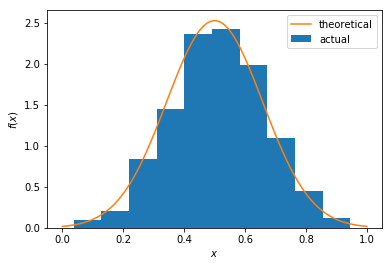

In [78]:
clt_beta(sample_beta, 5)

Теоретическое среднее vs приближенное: 0.50 vs 0.51
Теоретическое стандартное откл. vs приближенное: 0.11 vs 0.11


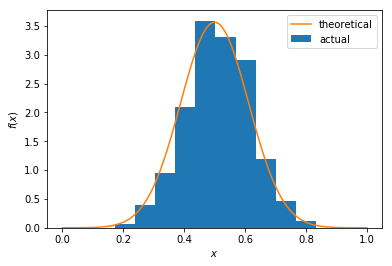

In [57]:
clt_beta(sample_beta, 10)

Теоретическое среднее vs приближенное: 0.50 vs 0.51
Теоретическое стандартное откл. vs приближенное: 0.05 vs 0.05


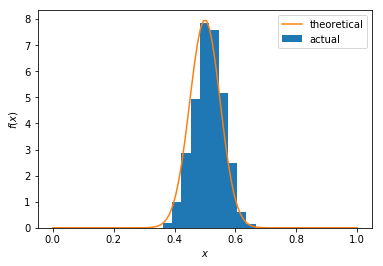

In [58]:
clt_beta(sample_beta, 50)

# Гамма-распределение

Гамма-распределение в теории вероятностей — это двухпараметрическое семейство абсолютно непрерывных распределений. Если параметр k принимает целое значение, то такое гамма-распределение также называется распределе́нием Эрла́нга.

https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

Возьмем распределение с параметрами k = 1, theta = 2 и создадим выборку из n = 1000

In [138]:
gamma_rv = stats.gamma(2)
sample_gamma = gamma_rv.rvs(1000)

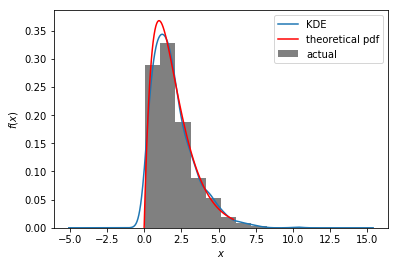

In [145]:
x2 = np.linspace(0, 6, 100)
pdf2 = gamma_rv.pdf(x2)

df2 = pd.DataFrame(sample_gamma, columns=['KDE'])
ax2 = df2.plot(kind='density')

plt.plot(x2, pdf2, label ='theoretical pdf', c ='r', alpha = 1)
plt.hist(sample_gamma, normed=True, color='grey', label='actual')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Cреднее и дисперсия определены следующим образом:

$$\mu = k{\theta } $$

$$\sigma^2 = k{\theta ^{2}} $$
 
Рассчитаем эти параметры, чтобы сравнивать получаемые опытным путем параметры с правилами центральной предельной теоремы.

In [146]:
k, theta = 1, 2
MU2 = k*theta
VAR2 = k*(theta**2)
SIGMA2 = sqrt(VAR2)
MU2, SIGMA2

(2, 2.0)

In [152]:
def clt_gamma(sample, sub_sample_size, n_sub_samples = 1000):
    means = []
    for i in range(n_sub_samples):
        sub_sample = sample[np.random.randint(0, len(sample), sub_sample_size)]
        means.append(np.mean(sub_sample))
        
    mu = np.mean(means)
    sigma = np.std(means, ddof=1)
    SE = SIGMA2/sqrt(sub_sample_size) # стандартная ошибка среднего
    
    norm_rv = stats.norm(MU2, SE)
    
    print('Теоретическое среднее vs приближенное: {:.2f} vs {:.2f}'.format(MU2, mu))
    print('Теоретическое стандартное откл. vs приближенное: {:.2f} vs {:.2f}'.format(SE, sigma))
    
    plt.hist(means, normed=True, label='actual')
    plt.plot(x2, norm_rv.pdf(x2), label='theoretical')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

Теоретическое среднее vs приближенное: 2.00 vs 1.97
Теоретическое стандартное откл. vs приближенное: 0.89 vs 0.63


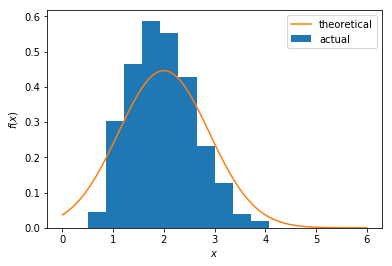

In [153]:
clt_gamma(sample_gamma, 5)

Теоретическое среднее vs приближенное: 2.00 vs 1.98
Теоретическое стандартное откл. vs приближенное: 0.63 vs 0.43


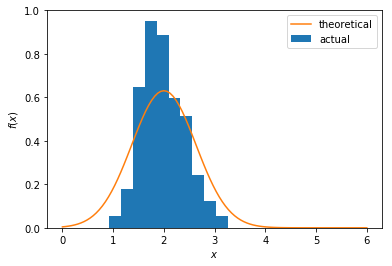

In [154]:
clt_gamma(sample_gamma, 10)

Теоретическое среднее vs приближенное: 2.00 vs 1.96
Теоретическое стандартное откл. vs приближенное: 0.28 vs 0.20


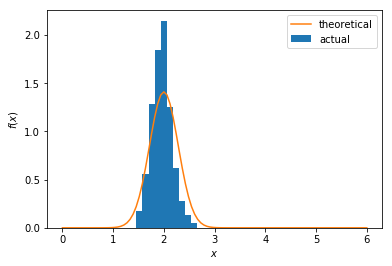

In [155]:
clt_gamma(sample_gamma, 50)

In [ ]:
ЦГТ работает дяже при ассиметричных распределениях. Чем больше n, тем лучше распределение выборочных средних описывается нормальным распределением